# Data Science Capstone – The Battle of the Neighbourhoods

## Analysis of Neighbourhoods in North York, Ontario for Prospective Residents

### 1. Installation and Import of Libraries

In [1]:
!pip install folium
!pip install geopy
import folium
import numpy as np 
import pandas as pd 
import json 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors 
from sklearn.cluster import KMeans 
from bs4 import BeautifulSoup 
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
print("Libraries Imported.")

Libraries Imported.


### 2. Data Scraping and Dataframe Formation

#### Obtaining Initial Data From Wikipedia Page

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')

#### Creating the First Dataframe

In [3]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [4]:
toronto_df = pd.DataFrame(table_contents)

toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [5]:
#Cleaning the Dataframe
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


#### Adding Latitude and Longitude to the Dataframe

In [6]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:
geospatial_data.columns=['PostalCode','Latitude','Longitude']
#Merging the Dataframes to produce the Final Dataframe
merge_df=pd.merge(df,geospatial_data,on='PostalCode')
merge_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [20]:
merge_df.set_index("Borough", inplace=True)
noyo_df=merge_df.loc[['North York']] #"noyo" will be used as shorthand for North York from hereon
noyo_df

,PostalCode,Neighborhood,Latitude,Longitude
Borough,,,,
North York,M3A,Parkwoods,43.753259,-79.329656
North York,M4A,Victoria Village,43.725882,-79.315572
North York,M6A,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
North York,M3B,Don Mills North,43.745906,-79.352188
North York,M6B,Glencairn,43.709577,-79.445073
North York,M3C,Don Mills South,43.725900,-79.340923
North York,M2H,Hillcrest Village,43.803762,-79.363452
North York,M3H,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
North York,M2J,"Fairview, Henry Farm, Oriole",43.778517,-79.346556


### 3. Map of North York

In [21]:
address = 'North York, Toronto, Ontario, Canada'
geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York are 43.7543263, -79.44911696639593.


In [23]:
noyo_map = folium.Map(location=[latitude, longitude], zoom_start=10) 
for lat, lng, neighborhood in zip(noyo_df['Latitude'], noyo_df['Longitude'], noyo_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='#0cff00',
        fill_opacity=0.5,
        parse_html=False).add_to(noyo_map)
    
noyo_map

In [28]:
address = 'North York,Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geographical Co-ordinates of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geographical Co-ordinates of Neighborhood_1 are 43.7543263, -79.44911696639593.


### 4. Obtaining and Comparing Data on Things to Do in Each Neighborhood

In [29]:
CLIENT_ID = 'C0GSFREHVJH3Q2AFMXOIQX5AXDUTYYB0XMVTIXHZ1U5KERM4' # my Foursquare ID
CLIENT_SECRET = 'AGKDOSVK3SOAPAVLKBFBKJYIS0BP2LDEQM4BKKBVA3QLL1VC' # my Foursquare Secret
VERSION = '20210713'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentials:
CLIENT_ID: C0GSFREHVJH3Q2AFMXOIQX5AXDUTYYB0XMVTIXHZ1U5KERM4
CLIENT_SECRET: AGKDOSVK3SOAPAVLKBFBKJYIS0BP2LDEQM4BKKBVA3QLL1VC


In [30]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_x, 
   longitude_y, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [31]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

<ipython-input-31-86d74ecd55ea>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc',
       'venue.location.neighborhood', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups'],
      dtype='object')

In [32]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Grill Gate,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",43.753123,-79.451690
1,Wolfie's Deli,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",43.754875,-79.442438
2,Orly Restaurant & Grill,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.754493,-79.443507
3,Tim Hortons,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.754767,-79.443250
4,Bagel Plus,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.755395,-79.440686


In [34]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Grill Gate,Mediterranean Restaurant,43.753123,-79.451690
1,Wolfie's Deli,Deli / Bodega,43.754875,-79.442438
2,Orly Restaurant & Grill,Middle Eastern Restaurant,43.754493,-79.443507
3,Tim Hortons,Coffee Shop,43.754767,-79.443250
4,Bagel Plus,Restaurant,43.755395,-79.440686


In [35]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Pizza Place                  3
American Restaurant          1
Mediterranean Restaurant     1
Coffee Shop                  1
Middle Eastern Restaurant    1
Sushi Restaurant             1
Grocery Store                1
Restaurant                   1
Deli / Bodega                1
Fried Chicken Joint          1
Name: categories, dtype: int64

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
noyo_venues = getNearbyVenues(names=noyo_df['Neighborhood'],
                                   latitudes=noyo_df['Latitude'],
                                   longitudes=noyo_df['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills North
Glencairn
Don Mills South
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview East
York Mills, Silver Hills
Downsview West
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview Central
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale South
Downsview Northwest
York Mills West
Willowdale West


In [38]:
print('There are {} Unique Categories.'.format(len(noyo_venues['Venue Category'].unique())))
noyo_venues.groupby('Neighborhood').count().head()

There are 117 Unique Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",26,26,26,26,26,26
Bayview Village,9,9,9,9,9,9
"Bedford Park, Lawrence Manor East",29,29,29,29,29,29
Don Mills North,7,7,7,7,7,7
Don Mills South,22,22,22,22,22,22


In [39]:
# one hot encoding
noyo_one_hot = pd.get_dummies(noyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
noyo_one_hot['Neighborhood'] = noyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [noyo_one_hot.columns[-1]] + list(noyo_one_hot.columns[:-1])
noyo_grouped = noyo_one_hot.groupby('Neighborhood').mean().reset_index()
noyo_one_hot.head()

,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,...,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Women's Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Parkwoods
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Parkwoods
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Parkwoods
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Parkwoods
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Victoria Village


In [40]:
num_top_venues = 5
for hood in noyo_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =noyo_grouped[noyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bathurst Manor, Wilson Heights, Downsview North ----
            venue  freq
0            Bank  0.08
1     Coffee Shop  0.08
2            Park  0.08
3  Sandwich Place  0.04
4     Pizza Place  0.04


---- Bayview Village ----
           venue  freq
0           Bank  0.22
1           Café  0.11
2  Grocery Store  0.11
3     Playground  0.11
4   Intersection  0.11


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0  Italian Restaurant  0.10
1         Coffee Shop  0.10
2    Sushi Restaurant  0.07
3      Sandwich Place  0.07
4   Indian Restaurant  0.03


---- Don Mills North ----
                  venue  freq
0   Japanese Restaurant  0.29
1                   Gym  0.14
2  Caribbean Restaurant  0.14
3                  Café  0.14
4          Dessert Shop  0.14


---- Don Mills South ----
                venue  freq
0                 Gym  0.09
1         Coffee Shop  0.09
2          Restaurant  0.09
3         Supermarket  0.05
4  Italian Restaurant  0.05


---- Downsvi

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = noyo_grouped['Neighborhood']

for ind in np.arange(noyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(noyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Park,Bank,Mobile Phone Shop,Sandwich Place,Middle Eastern Restaurant,Community Center,Deli / Bodega,Pharmacy,Pizza Place
1,Bayview Village,Bank,Chinese Restaurant,Intersection,Grocery Store,Japanese Restaurant,Café,Playground,Skating Rink,Dim Sum Restaurant,Dessert Shop
2,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Sandwich Place,Sushi Restaurant,Café,Liquor Store,Juice Bar,Butcher,Pharmacy,Pizza Place
3,Don Mills North,Japanese Restaurant,Gym,Caribbean Restaurant,Café,Dessert Shop,Baseball Field,Electronics Store,Community Center,Construction & Landscaping,Convenience Store
4,Don Mills South,Gym,Restaurant,Coffee Shop,Intersection,Dim Sum Restaurant,Japanese Restaurant,Italian Restaurant,Art Gallery,Bike Shop,Sandwich Place


### 5. K-Means Clustering of Neighbourhoods

In [62]:
noyo_clustering = noyo_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(noyo_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 1], dtype=int32)

In [63]:
neighborhoods_venues_sorted.insert(0, "Cluster", kmeans.labels_)

noyo_merge_df =noyo_df.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
noyo_merge_df = noyo_merge_df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

noyo_merge_df.head()

,PostalCode,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Borough,,,,,,,,,,,,,,,
North York,M3A,Parkwoods,43.753259,-79.329656,2,Park,Hotel,Food & Drink Shop,Discount Store,Coffee Shop,Comfort Food Restaurant,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop
North York,M4A,Victoria Village,43.725882,-79.315572,0,Pizza Place,Sporting Goods Shop,Coffee Shop,Park,Hockey Arena,Portuguese Restaurant,Playground,Deli / Bodega,Cosmetics Shop,Convenience Store
North York,M6A,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Furniture / Home Store,Fast Food Restaurant,Coffee Shop,Vietnamese Restaurant,Accessories Store,Park,Cheese Shop,Mediterranean Restaurant,Dessert Shop
North York,M3B,Don Mills North,43.745906,-79.352188,0,Japanese Restaurant,Gym,Caribbean Restaurant,Café,Dessert Shop,Baseball Field,Electronics Store,Community Center,Construction & Landscaping,Convenience Store
North York,M6B,Glencairn,43.709577,-79.445073,0,Pizza Place,Grocery Store,Italian Restaurant,Ice Cream Shop,Park,Playground,Latin American Restaurant,Restaurant,Japanese Restaurant,Coffee Shop


In [67]:
kclusters = 10
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(noyo_merge_df['Latitude'], 
                                   noyo_merge_df['Longitude'], 
                                   noyo_merge_df['Neighborhood'], 
                                   noyo_merge_df['Cluster']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [69]:
df1=noyo_merge_df.loc[noyo_merge_df['Cluster'] == 0,noyo_merge_df.columns[[2] + list(range(5, noyo_merge_df.shape[1]))]]
df2=noyo_merge_df.loc[noyo_merge_df['Cluster'] == 1,noyo_merge_df.columns[[2] + list(range(5, noyo_merge_df.shape[1]))]]
df3=noyo_merge_df.loc[noyo_merge_df['Cluster'] == 2,noyo_merge_df.columns[[2] + list(range(5, noyo_merge_df.shape[1]))]]

### 5. Comparing Average Housing Costs Between Neighborhoods in North York

In [71]:
noyo_avg_housing=pd.DataFrame({"Neighborhood":noyo_df["Neighborhood"],
                                                                  "Average Housing Price":[1000000, 1000000, 927000, 1000000, 1500000, 1000000, 
                                                                                           979000, 1200000, 716000, 749000, 847000, 1300000, 2700000, 860000, 
                                                                                           1100000, 848000, 1200000, 1000000, 1500000, 828000, 1800000, 700000, 
                                                                                           3000000, 961000]})

In [72]:
noyo_avg_housing.set_index('Neighborhood',inplace=True,drop=True)

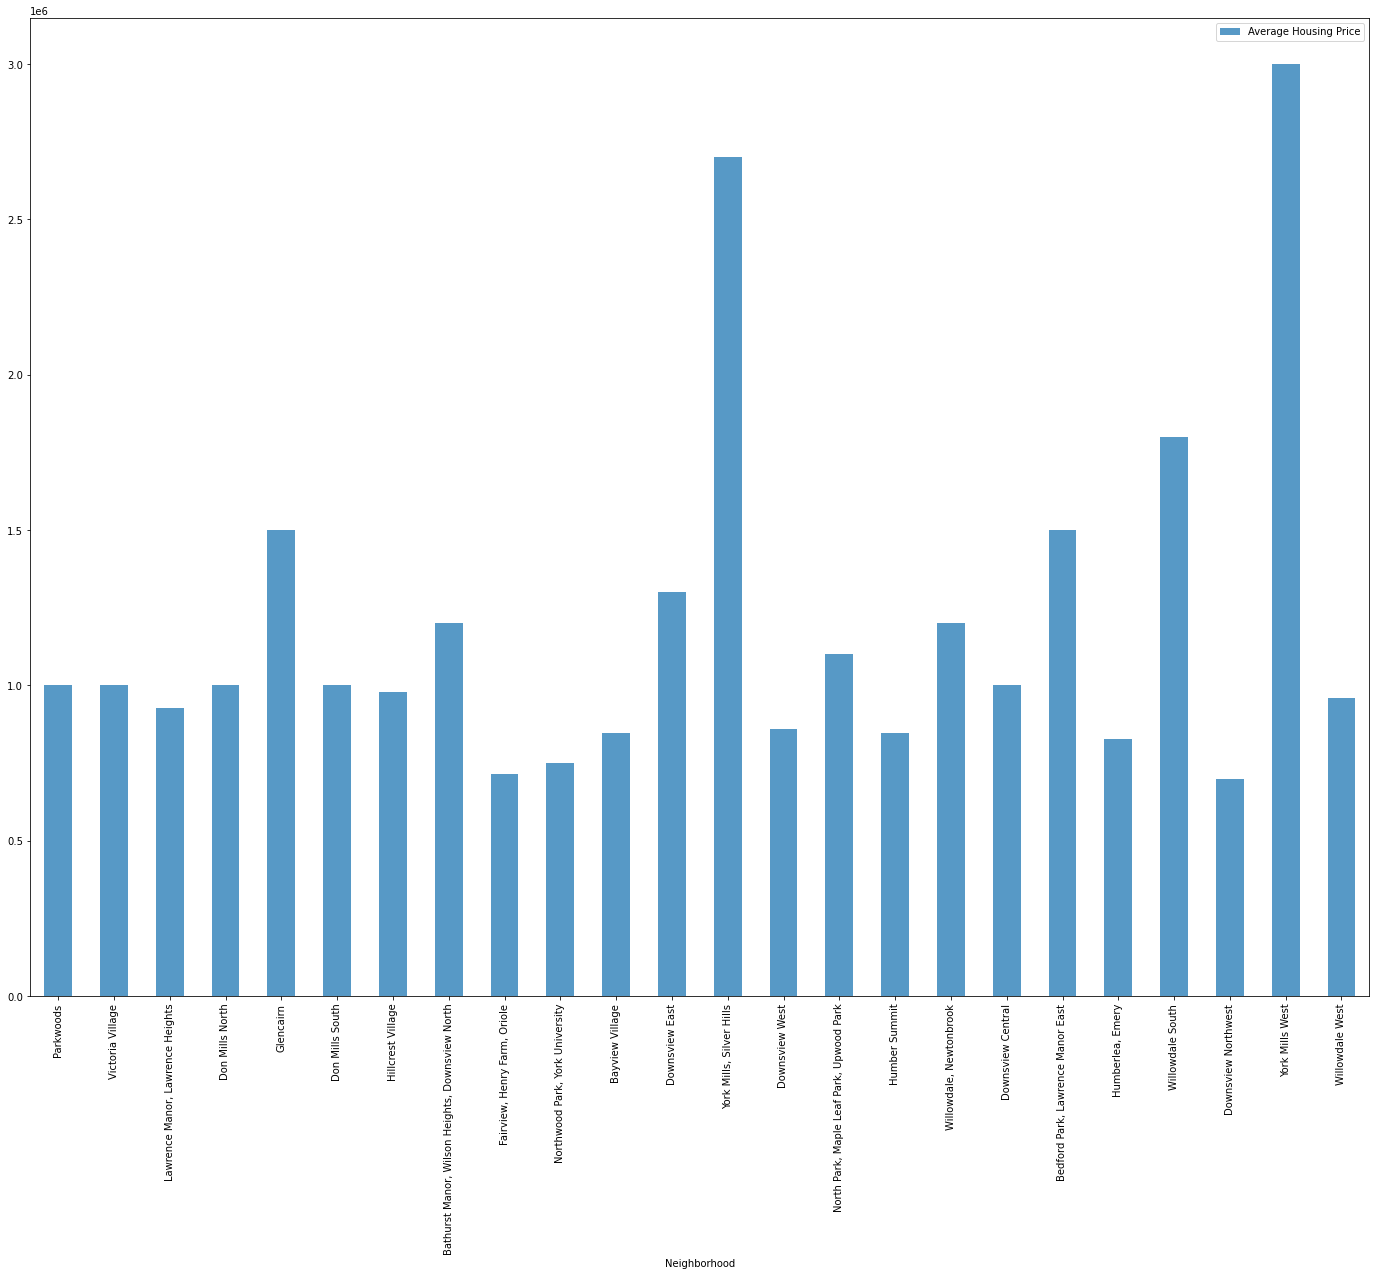

In [73]:
noyo_avg_housing.plot(kind='bar',figsize=(24,18),alpha=0.75)

In [74]:
noyo_school_rank=pd.DataFrame({"Neighborhood":noyo_df["Neighborhood"],
                                                              "Top School Ranking":[7.5, 8.3, 4.7, 9.4, 6.9, 9.1, 
                                                                                                     8.5, 7.6, 8.4, 4.8, 5.3, 5.7, 
                                                                                                    10.0, 5.0, 6.7, 7.7, 6.1, 6.6, 
                                                                                                    8.4, 7.0, 7.2, 5.1, 9.2, 8.8]})

### 6. Comparing the Top Schools in Each Neighborhood in North York

In [75]:
noyo_school_rank.set_index('Neighborhood',inplace=True,drop=True)

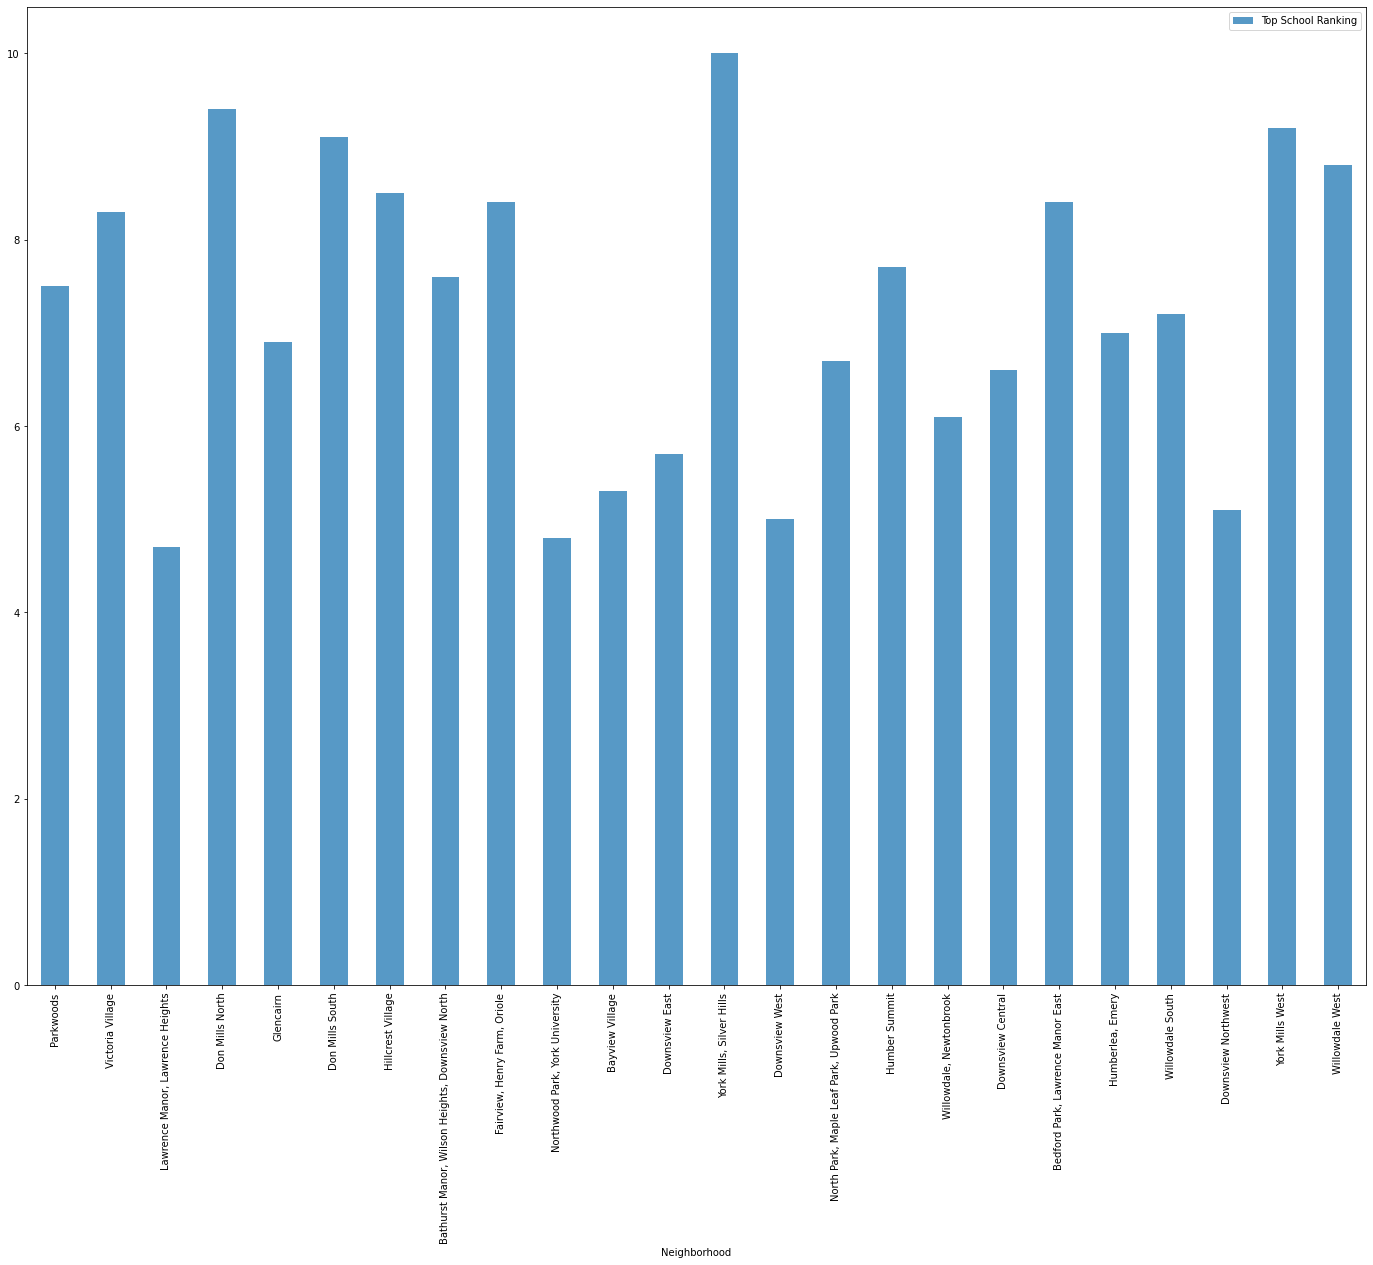

In [76]:
noyo_school_rank.plot(kind='bar',figsize=(24,18),alpha=0.75)